## Objective

A small charter school network has been having issues with proficiency in both Math and ELA on their local diagnostic exams which they are paying 20,757.50 USD to implement as well as state tests. In an effort to evaluate the curriculum and rigor of their grading scale and academic practices, the goal of this project is to compare overall proficinecy in all subjects, as well as Math and ELA to the proficiency metrics on their local diagnostic exams for the first quarter of the 2023-2024 academic school year.

## Variables

The following varibles will have an impact on the analysis:

- **iReady Proficiency**: Proficiency based on the Overall Relative Placement of a student’s baseline iReady result
    - Proficienct:
        - Early on Grade Level
        - Mid or Above Grade Level 
        
- **Q1 Grade Proficiency**: Proficiency based on a students Q1 Grade
    - Proficient: A grade of 79.9 or above

In [448]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [449]:
#importing data
Q1_Grade = pd.read_csv(r"C:\Users\togarro\Downloads\Q1 FA Grades Math and ELA.csv")
ir1_ELA = pd.read_csv(r"C:\Users\togarro\Downloads\iReady 1 ELA 2324.csv")
ir1_Math = pd.read_csv(r"C:\Users\togarro\Downloads\iReady 1 Math 2324.csv")

In [450]:
#Subsetting get rid of values with no grade input
Q1_Grade = Q1_Grade[Q1_Grade['Q1 Grade'].notnull()]
Q1_Grade.isnull().sum()

Student Last Name             0
Student First Name            0
Student Grade Level           0
Class Name                    0
Primary Teacher Last Name     0
Primary Teacher First Name    0
Q1 Grade                      0
dtype: int64

In [451]:
#Data Cleaning - Making String in the Student Grade Level Column into integers
Q1_Grade['Student Grade Level'] = Q1_Grade['Student Grade Level'].str[:2]
Q1_Grade['Student Grade Level'] = Q1_Grade['Student Grade Level'].str.replace('t',' ')
Q1_Grade['Student Grade Level'] = Q1_Grade['Student Grade Level'].str.replace('r',' ')
Q1_Grade['Student Grade Level'] = Q1_Grade['Student Grade Level'].str.replace('s',' ')
Q1_Grade['Student Grade Level'] = Q1_Grade['Student Grade Level'].str.replace('n',' ')
Q1_Grade['Student Grade Level'] = Q1_Grade['Student Grade Level'].str.replace('Ki','0')

#Changing data type
Q1_Grade['Student Grade Level'] = Q1_Grade['Student Grade Level'].astype('int64')

In [452]:
#List of values to subset in the dataframe
ELA = ['Lit', 'ELA','Eng','Writ']
Math = ['Alg','Math','Calc','Geo']

#Creating variables to use to subset dataframes
Subject_ELA = Q1_Grade['Class Name'].str.contains('|'.join(ELA))
Subject_Math = Q1_Grade['Class Name'].str.contains('|'.join(Math))

#Creating dataframes
ELA_Q1_Grade = Q1_Grade[Subject_ELA]
Math_Q1_Grade = Q1_Grade[Subject_Math]

In [453]:
#Overall,ELA, and Math Q1 Grade Averagae
Ovr_Grade = round(Q1_Grade.groupby('Student Grade Level')['Q1 Grade'].mean())
ELA_Grade = round(ELA_Q1_Grade.groupby('Student Grade Level')['Q1 Grade'].mean())
Math_Grade = round(Math_Q1_Grade.groupby('Student Grade Level')['Q1 Grade'].mean())

#Putting Overall Q1 Grades into a DataFrame
Ovr_Grade = pd.DataFrame(Ovr_Grade)
Ovr_Grade = Ovr_Grade.reset_index()
Ovr_Grade.rename(columns = {'Q1 Grade':'Q1 Grade Ovr Avg'},inplace = True)

#Putting ELA Q1 Grades into a DataFrame
ELA_Grade = pd.DataFrame(ELA_Grade)
ELA_Grade = ELA_Grade.reset_index()
ELA_Grade.rename(columns = {'Q1 Grade':'Q1 Grade ELA Avg'},inplace = True)

#Putting Math Q1 Grades into a DataFrame
Math_Grade = pd.DataFrame(Math_Grade)
Math_Grade = Math_Grade.reset_index()
Math_Grade.rename(columns = {'Q1 Grade':'Q1 Grade Math Avg'},inplace = True)

In [454]:
#Joining DataFrames
Grade_Agg = Ovr_Grade.merge(ELA_Grade, on = 'Student Grade Level', how = 'left')\
            .merge(Math_Grade, on = 'Student Grade Level', how = 'left')
#Setting Index 
Grade_Agg.set_index('Student Grade Level')

#Displaying DataFrame with Overall Q1 Grade Averages, Math Q1 Grade Averages, and ELA Q1 Grade Averages
Grade_Agg

,Student Grade Level,Q1 Grade Ovr Avg,Q1 Grade ELA Avg,Q1 Grade Math Avg
0,0,91.0,86.0,91.0
1,1,85.0,83.0,77.0
2,2,89.0,82.0,83.0
3,3,80.0,72.0,62.0
4,4,86.0,78.0,79.0
5,5,86.0,78.0,85.0
6,6,88.0,84.0,83.0
7,7,86.0,83.0,85.0
8,8,87.0,85.0,80.0
9,9,81.0,81.0,75.0


In [455]:
#Data Cleaning - Replacing values and changing data type of the Student Grade Column
ir1_ELA['Student Grade'] = ir1_ELA['Student Grade'].replace('K','0')
ir1_ELA['Student Grade'] = ir1_ELA['Student Grade'].astype('int64')

#Data Cleaning - Replacing values and changing data type of the Student Grade Column
ir1_Math['Student Grade'] = ir1_Math['Student Grade'].replace('K','0')
ir1_Math['Student Grade'] = ir1_Math['Student Grade'].astype('int64')

In [456]:
#Creating function for iReady Proficiency
def Proficiency(x):
    if x == 'Early On Grade Level':
        return 'On Grade Level'
    if x == 'Mid or Above Grade Level':
        return 'On Grade Level'
    else:
        return'Not On Grade Level'
#Creating Proficiency Column in ELA and Math
ir1_ELA['Proficiency'] = ir1_ELA['Overall Relative Placement'].apply(lambda x: Proficiency(x))
ir1_Math['Proficiency'] = ir1_Math['Overall Relative Placement'].apply(lambda x: Proficiency(x))

In [457]:
#iReady ELA Proficiency
ELA_Proficiency = round(ir1_ELA.groupby('Student Grade')['Proficiency'].value_counts(normalize = True),2)

#Putting Results in a DataFrame
ELA_Proficiency = pd.DataFrame(ELA_Proficiency)

#Renaming column 
ELA_Proficiency.rename(columns = {'Proficiency':'Proficiency Pct ir1 ELA'}, inplace = True)

#Reseting Index
ELA_Proficiency = ELA_Proficiency.reset_index()

#Subsetting Original DataFrame
ELA_Proficiency_On_Grade_Level = ELA_Proficiency[ELA_Proficiency['Proficiency'] == 'On Grade Level']

#Renaming Column for Joining
ELA_Proficiency_On_Grade_Level.rename(columns = {'Student Grade': 'Student Grade Level'}, inplace = True)

C:\Users\togarro\AppData\Local\Temp\ipykernel_20700\282797401.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ELA_Proficiency_On_Grade_Level.rename(columns = {'Student Grade': 'Student Grade Level'}, inplace = True)


In [458]:
#iReady Math Proficiency
Math_Proficiency = round(ir1_Math.groupby('Student Grade')['Proficiency'].value_counts(normalize = True),2)

#Putting Results in a DataFrame
Math_Proficiency = pd.DataFrame(Math_Proficiency)

#Renaming column 
Math_Proficiency.rename(columns = {'Proficiency': 'Proficiency Pct ir1 Math'}, inplace = True)

#Reseting Index
Math_Proficiency = Math_Proficiency.reset_index()

#Subsetting Original DataFrame
Math_Proficiency_On_Grade_Level = Math_Proficiency[Math_Proficiency['Proficiency']== 'On Grade Level']

#Renaming Column for Joining
Math_Proficiency_On_Grade_Level.rename(columns = {'Student Grade':'Student Grade Level'}, inplace = True)

C:\Users\togarro\AppData\Local\Temp\ipykernel_20700\3827537609.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Math_Proficiency_On_Grade_Level.rename(columns = {'Student Grade':'Student Grade Level'}, inplace = True)


In [459]:
#Conditional function to return students who are performing on Grade Level based on their Q1 Grade
def Grade_Level(x):
    if x > 79.9:
        return 'Grade Level'
    else:
        return'Not On Grade Level'

#Creating Proficiency Column via applying the function Grade_Level 
Q1_Grade['Proficiency'] = Q1_Grade['Q1 Grade'].apply(lambda x: Grade_Level(x))

In [460]:
#Overall Q1 Grade Proficiency
Ovr_Gr_Pro = round(Q1_Grade.groupby('Student Grade Level')['Proficiency'].value_counts(normalize = True),2)

#Putting Results in a DataFrame
Ovr_Gr_Pro = pd.DataFrame(Ovr_Gr_Pro)

#Renaming column for joining
Ovr_Gr_Pro.rename(columns = {'Proficiency':'Proficiency Pct Ovr'}, inplace = True)

#Resetting Index
Ovr_Gr_Pro = Ovr_Gr_Pro.reset_index()

#Subsetting Original DataFrame
Ovr_Gr_Pro_On_Gr_Lvl = Ovr_Gr_Pro[Ovr_Gr_Pro['Proficiency'] == 'Grade Level']

In [461]:
#Creating a variable for subsetting to group class names by subject
Subject_ELA = Q1_Grade['Class Name'].str.contains('|'.join(ELA))
Subject_Math = Q1_Grade['Class Name'].str.contains('|'.join(Math))

#Subsetting DataFrame 
Subject_ELA_Pro = Q1_Grade[Subject_ELA]
Subject_Math_Pro = Q1_Grade[Subject_Math]

In [462]:
#ELA Q1 Grade Proficiency
Subject_ELA_Gr_Pro = round(Subject_ELA_Pro.groupby('Student Grade Level')['Proficiency'].value_counts(normalize = True),2)

#Putting Results into a DataFrame
Subject_ELA_Gr_Pro = pd.DataFrame(Subject_ELA_Gr_Pro)

#Renaming Columns for joining
Subject_ELA_Gr_Pro.rename(columns = {'Proficiency':'Proficiency Pct ELA'}, inplace = True)

#Resetting Index
Subject_ELA_Gr_Pro = Subject_ELA_Gr_Pro.reset_index()

#Subsetting DataFrame
Subject_ELA_Gr_Pro = Subject_ELA_Gr_Pro[Subject_ELA_Gr_Pro['Proficiency'] == 'Grade Level']

In [463]:
#ELA Q1 Grade Proficiency
Subject_Math_Gr_Pro = round(Subject_Math_Pro.groupby('Student Grade Level')['Proficiency'].value_counts(normalize = True),2)

#Putting Results into a DataFrame
Subject_Math_Gr_Pro = pd.DataFrame(Subject_Math_Gr_Pro)

#Renaming columns for joining
Subject_Math_Gr_Pro.rename(columns = {'Proficiency':'Proficiency Pct Math'}, inplace = True)

#Resetting Index
Subject_Math_Gr_Pro = Subject_Math_Gr_Pro.reset_index()

#Subsetting DataFrame
Subject_Math_Gr_Pro = Subject_Math_Gr_Pro[Subject_Math_Gr_Pro['Proficiency'] == 'Grade Level']

In [464]:
#Joining Proficiency DataFrames
Proficiency = Ovr_Gr_Pro_On_Gr_Lvl.merge(Subject_ELA_Gr_Pro, on = 'Student Grade Level', how = 'left')\
            .merge(ELA_Proficiency_On_Grade_Level, on = 'Student Grade Level', how = 'left')\
            .merge(Subject_Math_Gr_Pro, on = 'Student Grade Level', how = 'left')\
            .merge(Math_Proficiency_On_Grade_Level, on = 'Student Grade Level', how = 'left')

C:\Users\togarro\AppData\Local\Temp\ipykernel_20700\2016675762.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Proficiency_x'} in the result is deprecated and will raise a MergeError in a future version.
  Proficiency = Ovr_Gr_Pro_On_Gr_Lvl.merge(Subject_ELA_Gr_Pro, on = 'Student Grade Level', how = 'left')\


In [465]:
#Subsetting Joined Dataset columns and choosing indexes so that there are no null values
Proficiency = Proficiency[['Proficiency Pct Ovr','Proficiency Pct ELA','Proficiency Pct ir1 ELA','Proficiency Pct Math','Proficiency Pct ir1 Math']]
Proficiency = Proficiency.iloc[0:9]

#Making decimals into integers
cols = ['Proficiency Pct Ovr','Proficiency Pct ELA','Proficiency Pct ir1 ELA','Proficiency Pct Math','Proficiency Pct ir1 Math']
Proficiency = Proficiency[cols] * 100

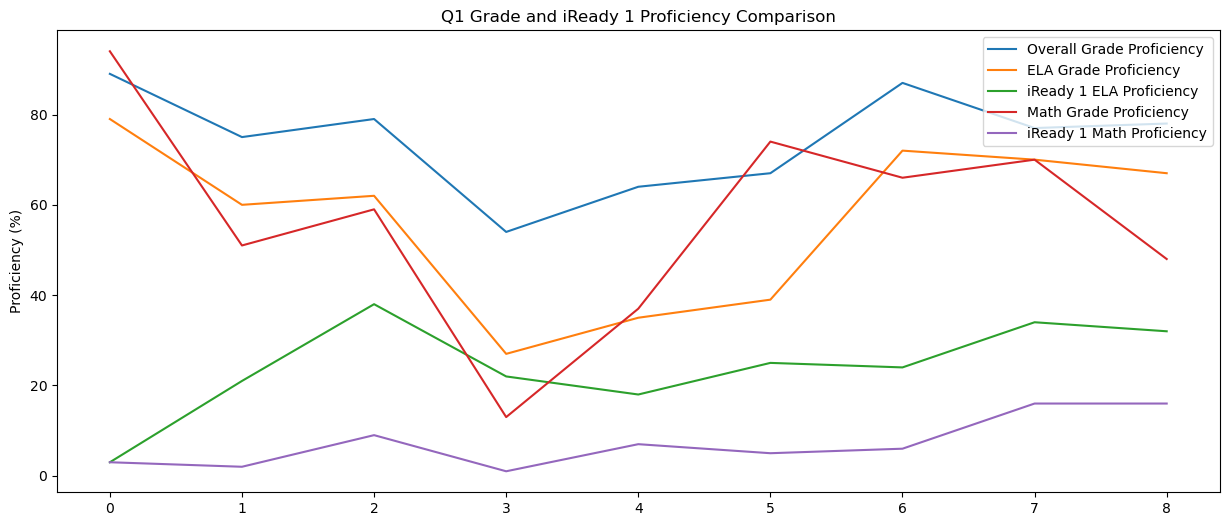

In [466]:
#Creating a plot

#Adjusting Figure Size
plt.figure(figsize = (15,6))

#Plotting Proficiency
plt.plot(Proficiency['Proficiency Pct Ovr'], label = 'Overall Grade Proficiency')
plt.plot(Proficiency['Proficiency Pct ELA'], label = 'ELA Grade Proficiency')
plt.plot(Proficiency['Proficiency Pct ir1 ELA'], label ='iReady 1 ELA Proficiency' )
plt.plot(Proficiency['Proficiency Pct Math'], label = 'Math Grade Proficiency')
plt.plot(Proficiency['Proficiency Pct ir1 Math'], label = 'iReady 1 Math Proficiency' )


# Labeling
plt.ylabel('Proficiency (%)')
plt.title('Q1 Grade and iReady 1 Proficiency Comparison')
plt.legend(loc = 'upper right')
plt.show()

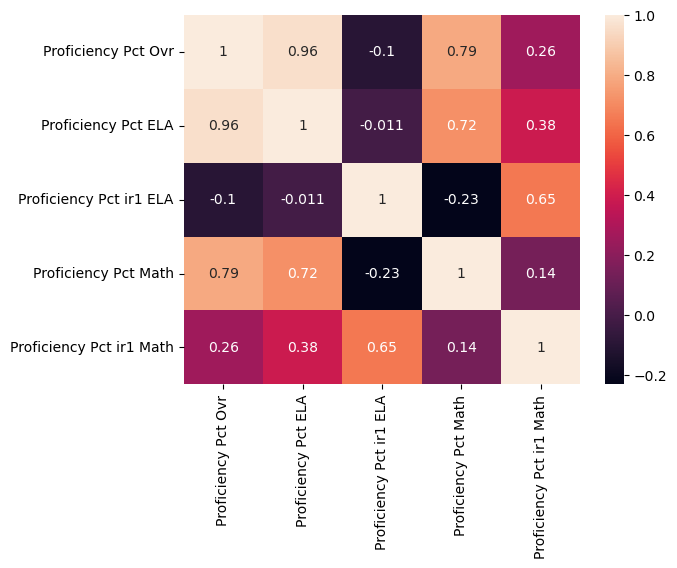

In [447]:
#Finding Correlation between Q1 Grade Proficiency and iReady Proficiency
correlation = Proficiency.corr()
sns.heatmap(correlation, annot = True)
plt.show()

## Conclusion

Based on the line plot and heatmap above, there is no correlation between the the small charter school network's grading system and its local diagnostic proficiency standards. 

The correlation coefficienct for the percentage of students that are considered to be proficienct in ELA based on the small charter school network's grading system in comparison to the percentage of students that are proficient in ELA based on the local diagnostic is -0.011 indicative of a lack of correlation between the two proficiency metrics.

The correlation coefficienct for the percentage of students that are considered to be proficienct in Math based on the small charter school network's grading system in comparison to the percentage of students that are proficient in Math based on the local diagnostic is 0.14 indicative of a lack of correlation. This is slightly better than the correlation coefficient associated with ELA, but still is not indicative of a correlattion between the two proficiency metrics.
